# Los números que caracterizan un sondeo de voto antes de unas Elecciones

Los sondeos que vemos en prensa los días antes de las elecciones son utilizados por unos y otros para influir en la intención de voto de los votantes. ¿Sabemos exactamente que significa que un determinado partido saque un 60% de votos?, sabemos a que aplica los intervalos de confianza o los errores de muestreo?
Veamos la teoría estadística que hay detras de ellos. 

Vamos a simplificar el problema asumiendo que queremos calcular el porcentaje de personas que van a votar a un determinado candidato. Un "p" por ciento de la población votará a ese candidato, y es ese número el que queremos estimar.

Para ello elegiremos un subconjunto $n$ de la población al que preguntaremos (y asumimos que dicen la verdad, ¡que es mucho asumir!).

En notación matemática significa que tenemos un conjunto de variables aleatorias $X_1, X_2, X_3...X_n$ en el que:
$$X_i=\left\{
                \begin{array}{ll}
                  1 \; \text{si la persona } i \text{ vota  al  candidato}\\
                  0 \; \text{si la persona }i\text{ no vota al candidato}
                \end{array}
              \right.
              $$

y definimos $S_n=X_1+X_2+\cdots+X_n$. Sabemos que si el conjunto se elige con aletoriedad y n es pequeño respecto a N entonces $S_n$ tiene una distribución binomial con parámetros $n$ y $p$.

Sabemos también por la Teoría del Límite Central que el valor normalizado de $S_n$ equivalente $S_n^{std}=\dfrac{S_n-np}{\sqrt{npq}}$, ya que la media de una binomial es $np$ y la varianza $npq$.

La tarea que tenemos es hacer la mejor estimación de $p$, que a priori es $\bar{p}=S_n/n$. Podemos desarrollar esa expresión tal que : $$\bar{p}=S_n/n=S_n/n-p+p=\dfrac{S_n-np}{n}+p=\dfrac{S_n-np}{\sqrt{n}\sqrt{n}}+p=\dfrac{S_n-np}{\sqrt{n}\sqrt{n}\sqrt{pq}}\sqrt{pq}+p=\dfrac{S_n-np}{\sqrt{npq}}\sqrt{\dfrac{pq}{n}}+p=S_n^{std}\sqrt{\dfrac{pq}{n}}+p$$, es decir: $$\bar{p}$ es una función lineal de $S_n^{*}$$, lo que significa que al tener $S_n^*$ una distribución normal entonces $\bar p$ también la tendrá. Y con unos parámetros tal que:
$$E[\bar{p}]=E\left[S_n^{*}\sqrt{\dfrac{pq}{n}}+p\right]=p$$ ya que $E\left[S_n^*\right]=0$ y $$Var\left[S_n^{*}\sqrt{\dfrac{pq}{n}}+p\right]=\sqrt{\dfrac{pq}{n}}$$ ya que la $Var\left[p\right]=0$ y la $Var\left[S_n^*\right]=1$.

Y a partir de aquí aplicamos lo que ya conocemos: la probabilidad agregada entre $\pm2\text{ varianzas}=95.4\%$, efectivamente:
$$P\left(\bar{p}-2\sqrt{\dfrac{\bar{p}\bar{q}}{n}}<p<\bar{p}+2\sqrt{\dfrac{\bar{p}\bar{q}}{n}}\right)\approx .954$$

Y si queremos que ese rango sea menor que un $6\%$, entonces obligaremos a que $2\sqrt{\dfrac{\bar{p}\bar{q}}{n}}\leq .03$ y como en todo caso $\bar{p}\bar{q}\leq 1/4$, entonces nos queda que $\dfrac{1}{\sqrt{n}}\leq.03$ que equivale a $n\geq1111$.


Como se realiza un sondeo: se eligen (al azar!!) n personas de un conjunto total N, y se les pregunta si vann

In [185]:
import pandas as pd
import numpy as np
from scipy.special import comb
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import math

In [28]:
def s_n(n,p):
    valor=np.random.binomial(n,p,1)
    return valor,(valor-n*p)/((n*p*(1-p))**(.5))

In [44]:
def x_j(j,n,p):
    return (j-n*p)/(n*p*(1-p))**(1/2)

In [268]:
def binomial(n,p,j):
    return comb(n,j,exact=False)*(p**j)*((1-p)**(n-j))

In [297]:
def pdf_normal(x, mu, sigma):
    return norm.pdf(x)
def cdf_normal(x):
    return norm.cdf(x)

In [303]:
cdf_normal(2)-cdf_normal(-2)

0.9544997361036416

In [299]:
cdf_normal(0+2*np.sqrt(p*q/n))-cdf_normal(0-2*np.sqrt(p*q/n))

0.07965567455405798

In [295]:
n=100
p=.5
q=1-p

In [280]:
x_range = np.linspace(0, n, n+1)
x_norm  = (x_range-n*p)/(n*p*(1-p))**(1/2)
y_binomial = binomial(n,p,x_range)*np.sqrt(n*p*(1-p))
y_normal = normal(x_norm,0,1)

array([7.69459863e-23, 5.57300002e-22, 3.87811193e-21, 2.59286470e-20,
       1.66558803e-19, 1.02797736e-18, 6.09575813e-18, 3.47296275e-17,
       1.90108154e-16, 9.99837875e-16, 5.05227108e-15, 2.45285529e-14,
       1.14415649e-13, 5.12775364e-13, 2.20798996e-12, 9.13472041e-12,
       3.63096150e-11, 1.38667999e-10, 5.08814028e-10, 1.79378391e-09,
       6.07588285e-09, 1.97731964e-08, 6.18262050e-08, 1.85736184e-07,
       5.36103534e-07, 1.48671951e-06, 3.96129909e-06, 1.01408521e-05,
       2.49424713e-05, 5.89430678e-05, 1.33830226e-04, 2.91946926e-04,
       6.11901930e-04, 1.23221917e-03, 2.38408820e-03, 4.43184841e-03,
       7.91545158e-03, 1.35829692e-02, 2.23945303e-02, 3.54745928e-02,
       5.39909665e-02, 7.89501583e-02, 1.10920835e-01, 1.49727466e-01,
       1.94186055e-01, 2.41970725e-01, 2.89691553e-01, 3.33224603e-01,
       3.68270140e-01, 3.91042694e-01, 3.98942280e-01, 3.91042694e-01,
       3.68270140e-01, 3.33224603e-01, 2.89691553e-01, 2.41970725e-01,
      

/Users/waly/anaconda3/envs/ML/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  


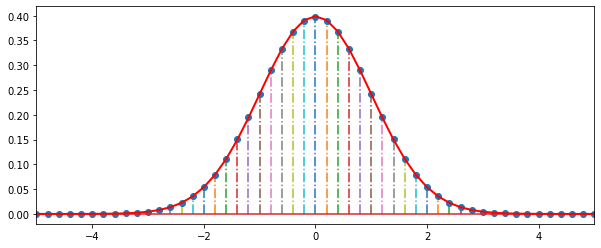

In [284]:
f = plt.figure(figsize=(50,20))
f.subplots_adjust(hspace=1, wspace=1)
ax1 = f.add_subplot(331)
#ax1.set_xlabel('{:,} términos en la suma'.format(lista_terms_sum[i]))
#    lista_axes[i].yaxis.set_major_formatter(PercentFormatter(1)
ax1.set_xlim(-5,5)
#    lista_axes[i].set_ylim(0.0,0.25)    
ax1.stem(x_norm,y_binomial,'-.')
#ax1.plot(x_norm,y_linea)
ax1.plot(x_norm, y_normal,linewidth=2, color='r')


In [329]:
poblacion=np.random.binomial(1,.35,1000000)

In [312]:
poblacion.sum()

350066

In [315]:
muestra=np.random.binomial(1,.01,1000000)

In [316]:
muestra.sum()

9987

In [318]:
(poblacion*muestra).sum()

3556

In [327]:
poblacion=np.linspace(0,10,11)*2

In [336]:
np.random.choice(poblacion,1200,replace=False).sum()/1200

0.3325

In [322]:
poblacion

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])